<a href="https://colab.research.google.com/github/Bokyoung-00/python_education/blob/master/%EC%82%BC%EC%84%B1%EC%B9%B4%EB%93%9C_%EB%B6%84%EC%84%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%config InlineBackend.figure_format = 'retina'
!apt -qq -y install fonts-nanum

The following package was automatically installed and is no longer required:
  libnvidia-common-440
Use 'apt autoremove' to remove it.
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 35 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Selecting previously unselected package fonts-nanum.
(Reading database ... 144556 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20170925-1_all.deb ...
Unpacking fonts-nanum (20170925-1) ...
Setting up fonts-nanum (20170925-1) ...
Processing triggers for fontconfig (2.12.6-0ubuntu2) ...


In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from pandas.plotting import register_matplotlib_converters

In [2]:
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
plt.rc('font', family='NanumBarunGothic') 
plt.rcParams["figure.figsize"] = (20, 10)
register_matplotlib_converters()
mpl.font_manager._rebuild()
mpl.pyplot.rc('font', family='NanumGothic')
fm._rebuild()

In [4]:
import matplotlib.pyplot as plt

import matplotlib.dates as mdates
import numpy as np
import pandas as pd
import seaborn as sns

import math
from datetime import date, timedelta

import warnings
warnings.filterwarnings("ignore")

In [20]:
# Mount Google Drive
from google.colab import drive # import drive from google colab
from os.path import join

ROOT = "/content/drive"     # default location for the drive
print(ROOT)                 # print content of ROOT (Optional)
drive.mount(ROOT)  

/content/drive
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [21]:
MY_GOOGLE_DRIVE_PATH = 'My Drive/' # 프로젝트 경로
PROJECT_PATH = join(ROOT, MY_GOOGLE_DRIVE_PATH) # 프로젝트 경로
print(PROJECT_PATH)

/content/drive/My Drive/


In [22]:
%cd "{PROJECT_PATH}"
%ls

/content/drive/My Drive
'Colab Notebooks'/   samsung_dataset/   trend_w_demo.csv


In [152]:
data= pd.read_csv("trend_w_demo.csv", encoding='CP949')
data.head()

,YM,Category,성별구분,연령대,기혼스코어,유아자녀스코어,초등학생자녀스코어,중고생자녀스코어,대학생자녀스코어,전업주부스코어
0,202005,할인점,0,F,high,low,high,mid,low,low
1,202005,취미,0,B,high,low,mid,mid,low,low
2,202005,오픈마켓/소셜,1,D,mid,mid,mid,mid,low,mid
3,202005,뷰티,0,D,mid,mid,mid,mid,low,low
4,202005,오픈마켓/소셜,0,G,high,low,mid,mid,mid,low


In [153]:
data['기혼스코어']

0         high
1         high
2          mid
3          mid
4         high
          ... 
452033     low
452034    high
452035    high
452036    high
452037    high
Name: 기혼스코어, Length: 452038, dtype: object

In [154]:
data.columns

Index(['YM', 'Category', '성별구분', '연령대', '기혼스코어', '유아자녀스코어', '초등학생자녀스코어',
       '중고생자녀스코어', '대학생자녀스코어', '전업주부스코어'],
      dtype='object')

In [155]:
columns_to_change=['기혼스코어', '유아자녀스코어', '초등학생자녀스코어',
       '중고생자녀스코어', '대학생자녀스코어', '전업주부스코어']

- 기혼스코어, 유아자녀스코어, 초등학생자녀스코어, 중고생자녀스코어, 대학생자녀스코어, 전업주부스코어 

확률 숫자로 변환하기
  + high : 3
  + mid : 2
  + low : 1

In [206]:
for col in columns_to_change:
  data[col].replace(to_replace="high", value="3", inplace=True)
  data[col].replace(to_replace="mid", value="2", inplace=True)
  data[col].replace(to_replace="low", value="1", inplace=True)
data.head()

,YM,Category,성별구분,연령대,기혼스코어,유아자녀스코어,초등학생자녀스코어,중고생자녀스코어,대학생자녀스코어,전업주부스코어
0,202005,할인점,0,F,3,1,3,2,1,1
1,202005,취미,0,B,3,1,2,2,1,1
2,202005,오픈마켓/소셜,1,D,2,2,2,2,1,2
3,202005,뷰티,0,D,2,2,2,2,1,1
4,202005,오픈마켓/소셜,0,G,3,1,2,2,2,1


In [157]:
data["Category"].unique()

array(['할인점', '취미', '오픈마켓/소셜', '뷰티', '디저트', '전문몰', '항공/여행사', '종합몰',
       '호텔/숙박', '면세점'], dtype=object)

In [158]:
cat_summary=data.groupby('Category').count()["연령대"].sort_values(ascending=False)

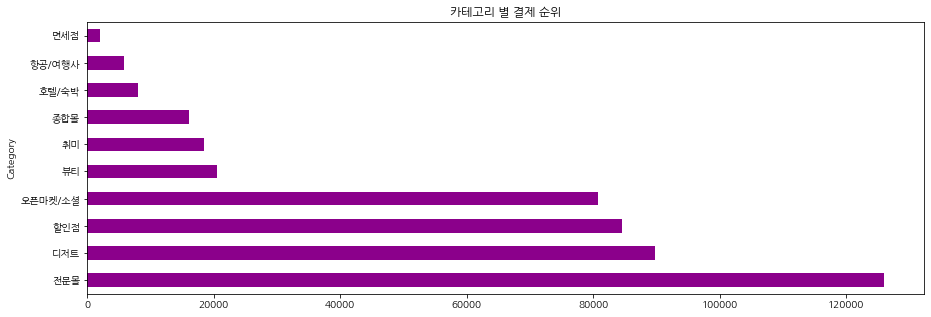

In [159]:
cat_summary.plot(kind='barh', figsize=(15,5), title="카테고리 별 결제 순위", color='darkmagenta')
plt.show()

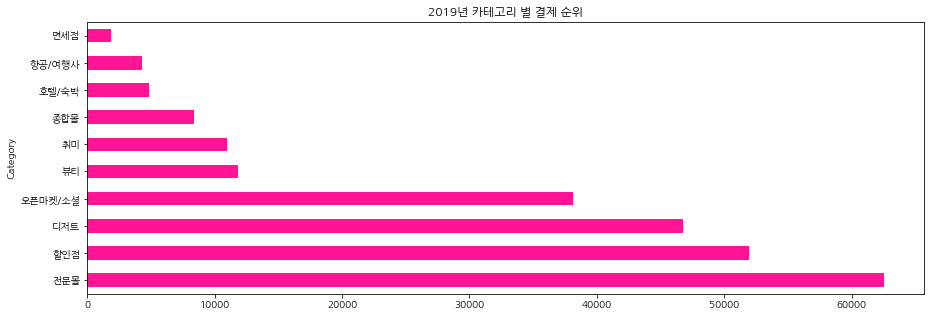

In [160]:
cat_summary_2019=data_2019.groupby('Category').count()["연령대"].sort_values(ascending=False)
cat_summary_2019.plot(kind='barh', figsize=(15,5), title="2019년 카테고리 별 결제 순위", color='deeppink')
plt.show()

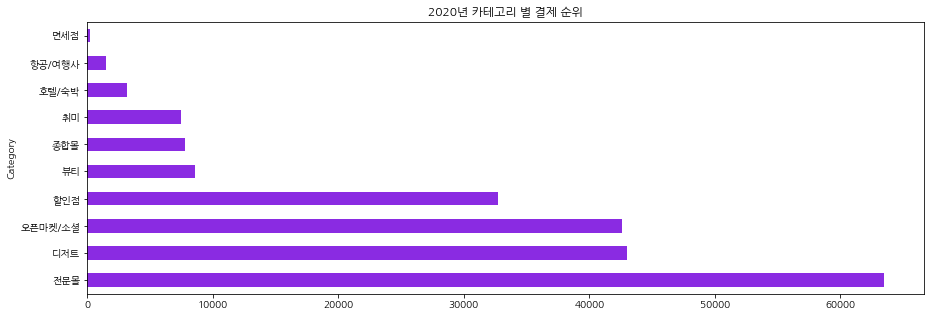

In [161]:
cat_summary_2020=data_2020.groupby('Category').count()["연령대"].sort_values(ascending=False)
cat_summary_2020.plot(kind='barh', figsize=(15,5), title="2020년 카테고리 별 결제 순위", color='blueviolet')
plt.show()

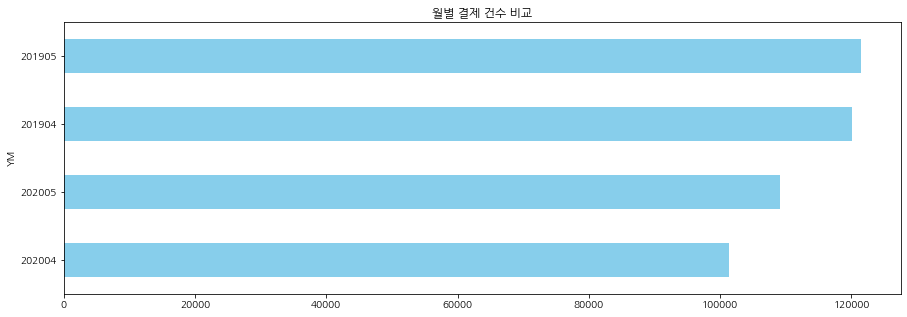

In [162]:
YM_summary= data.groupby('YM').count()['연령대'].sort_values()
YM_summary.plot(kind='barh', figsize=(15,5), title="월별 결제 건수 비교", color = 'skyblue')
plt.show()

2019년 대비 2020년 결제 비교 필요

In [255]:
data_2019= data[(data['YM']==201905) | (data['YM']==201904)]
data_2020= data[(data['YM']==202005) | (data['YM']==202004)]

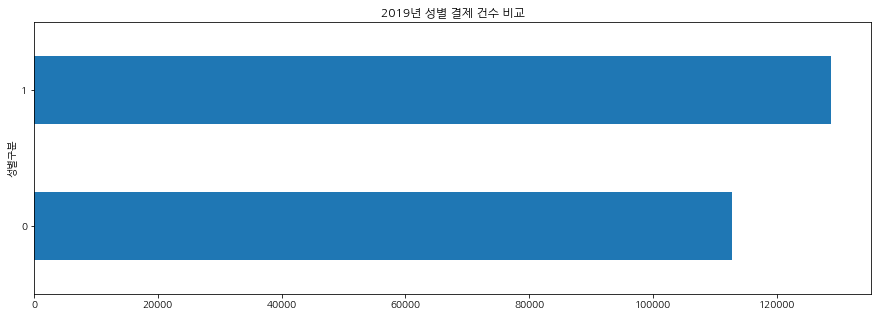

In [164]:
# 0: 남성, 1: 여성
gender_2019= data_2019.groupby('성별구분').count()['연령대'].sort_values()
gender_2019.plot(kind='barh', figsize=(15,5), title="2019년 성별 결제 건수 비교")
plt.show()

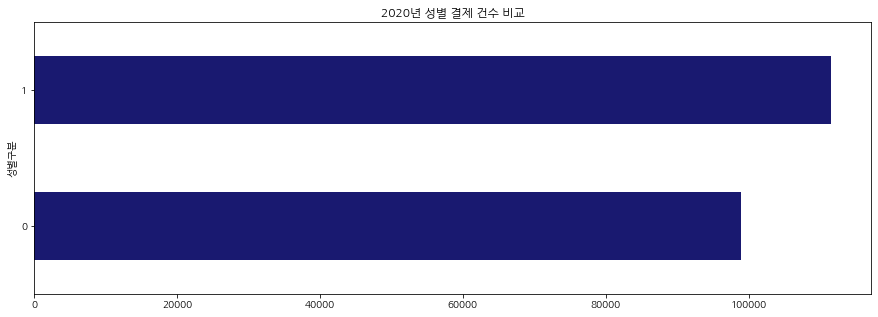

In [165]:
gender_2020= data_2020.groupby('성별구분').count()['연령대'].sort_values()
gender_2020.plot(kind='barh', figsize=(15,5), title="2020년 성별 결제 건수 비교", color='midnightblue')
plt.show()

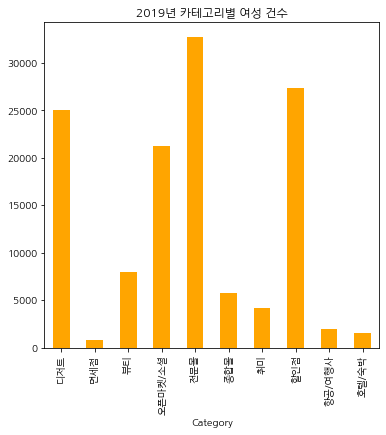

In [166]:
female_2019= data_2019[data_2019['성별구분']==1].groupby("Category").sum()['성별구분']

female_2019.plot(kind='bar', stacked=True, figsize= (6,6), color='orange', title="2019년 카테고리별 여성 건수")
  

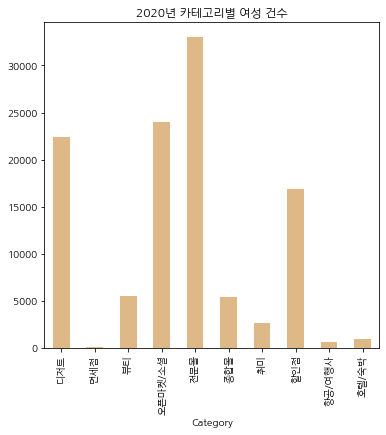

In [167]:
female_2020= data_2020[data_2020['성별구분']==1].groupby("Category").sum()['성별구분']

female_2020.plot(kind='bar', stacked=True, figsize= (6,6), color='burlywood', title="2020년 카테고리별 여성 건수")

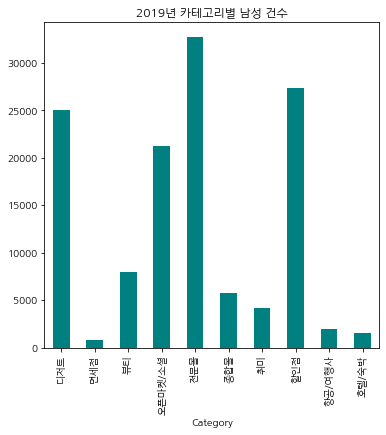

In [168]:
male_2019= data_2019[data_2019['성별구분']==1].groupby("Category").sum()['성별구분']

male_2019.plot(kind='bar', stacked=True, figsize= (6,6), color='teal', title="2019년 카테고리별 남성 건수")

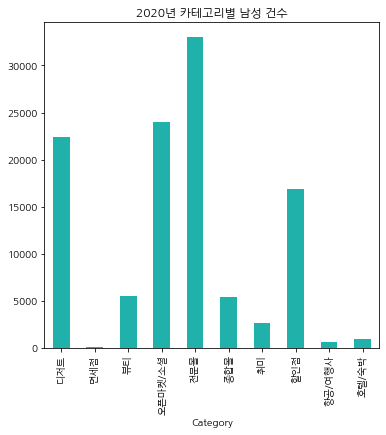

In [169]:
male_2020= data_2020[data_2020['성별구분']==1].groupby("Category").sum()['성별구분']

male_2020.plot(kind='bar', stacked=True, figsize= (6,6), color='lightseagreen', title="2020년 카테고리별 남성 건수")

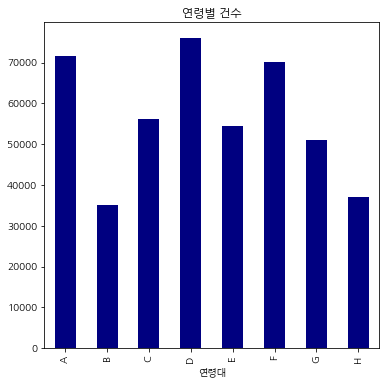

In [170]:
age= data.groupby("연령대").count()['Category']

age.plot(kind='bar', stacked=True, figsize= (6,6), color='navy', title="연령별 건수")

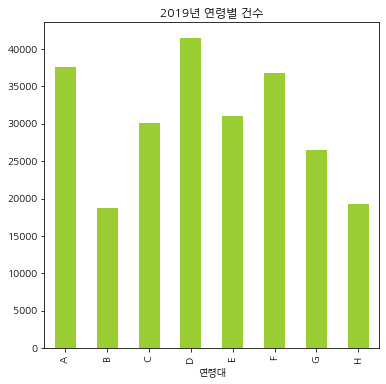

In [171]:
age_2019= data_2019.groupby("연령대").count()['Category']

age_2019.plot(kind='bar', stacked=True, figsize= (6,6), color='yellowgreen', title="2019년 연령별 건수")

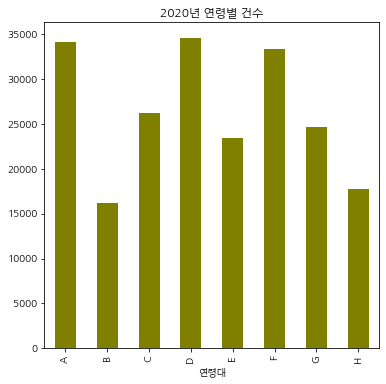

In [172]:
age_2020= data_2020.groupby("연령대").count()['Category']

age_2020.plot(kind='bar', stacked=True, figsize= (6,6), color='olive', title="2020년 연령별 건수")

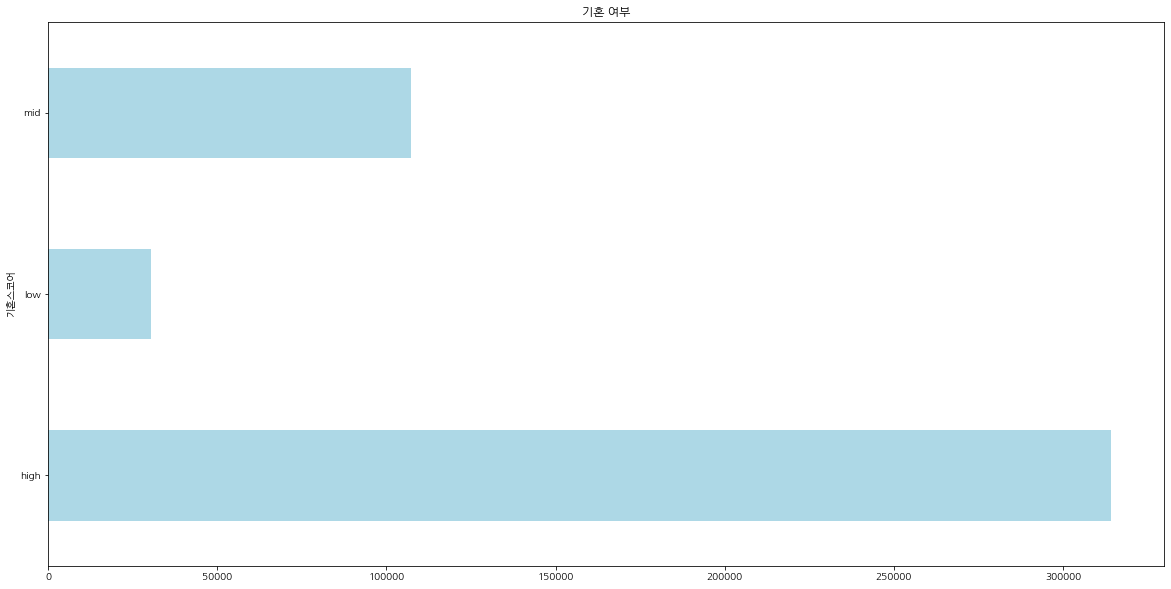

In [191]:
married= data.groupby("기혼스코어").count()['Category']

married.plot(kind='barh', stacked=True, color='lightblue', title="기혼 여부")


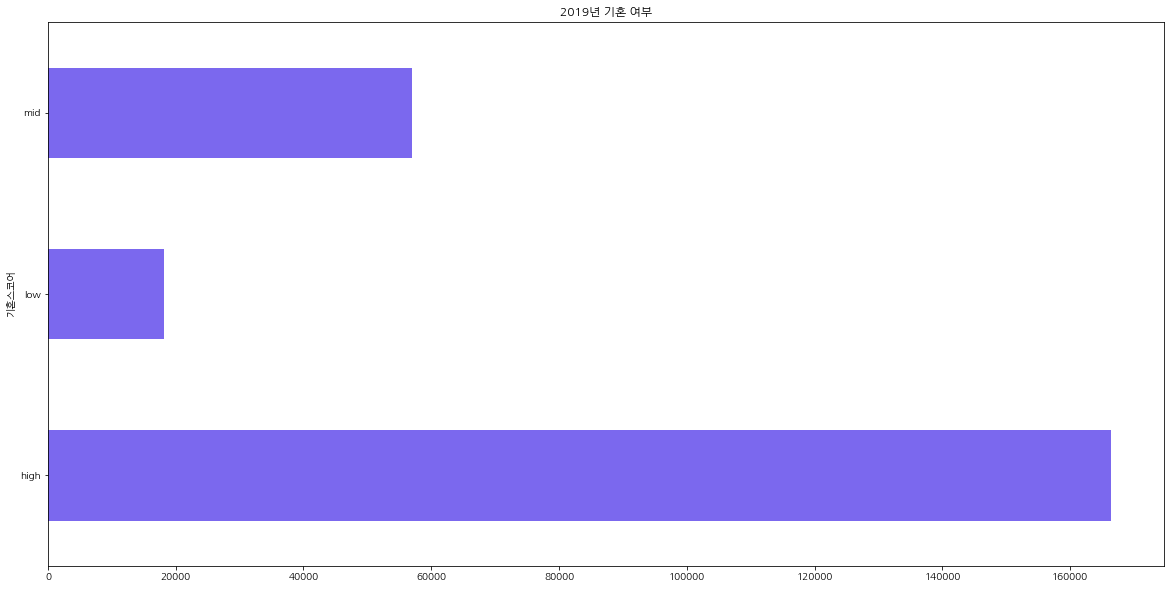

In [192]:
married_2019= data_2019.groupby("기혼스코어").count()['Category']

married_2019.plot(kind='barh', stacked=True, color='mediumslateblue', title="2019년 기혼 여부")

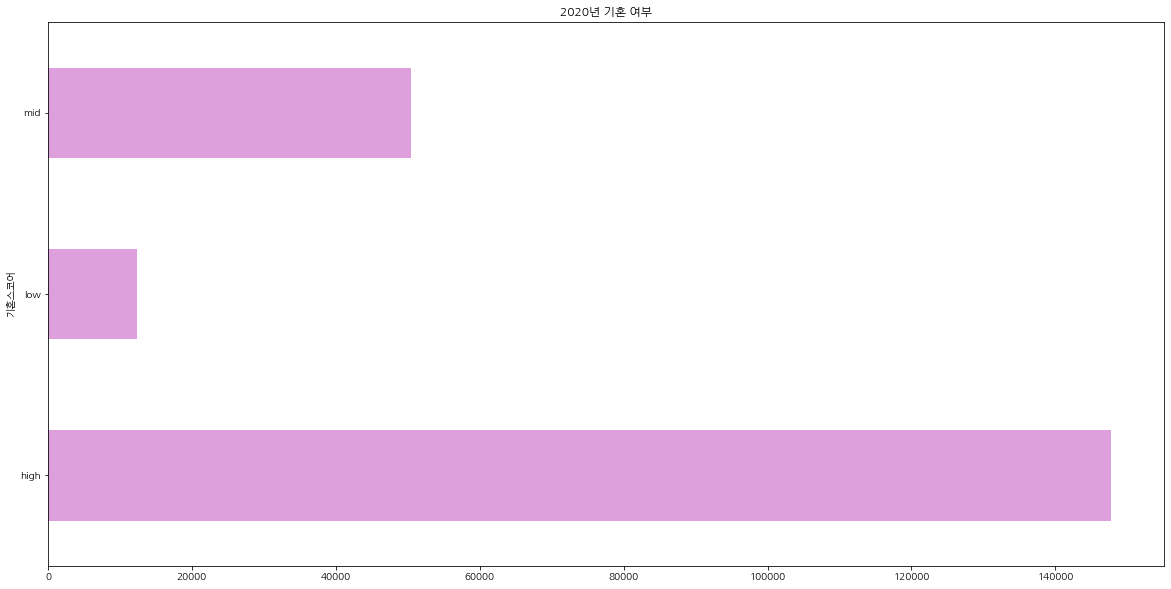

In [193]:
married_2020= data_2020.groupby("기혼스코어").count()['Category']

married_2020.plot(kind='barh', stacked=True, color='plum', title="2020년 기혼 여부")

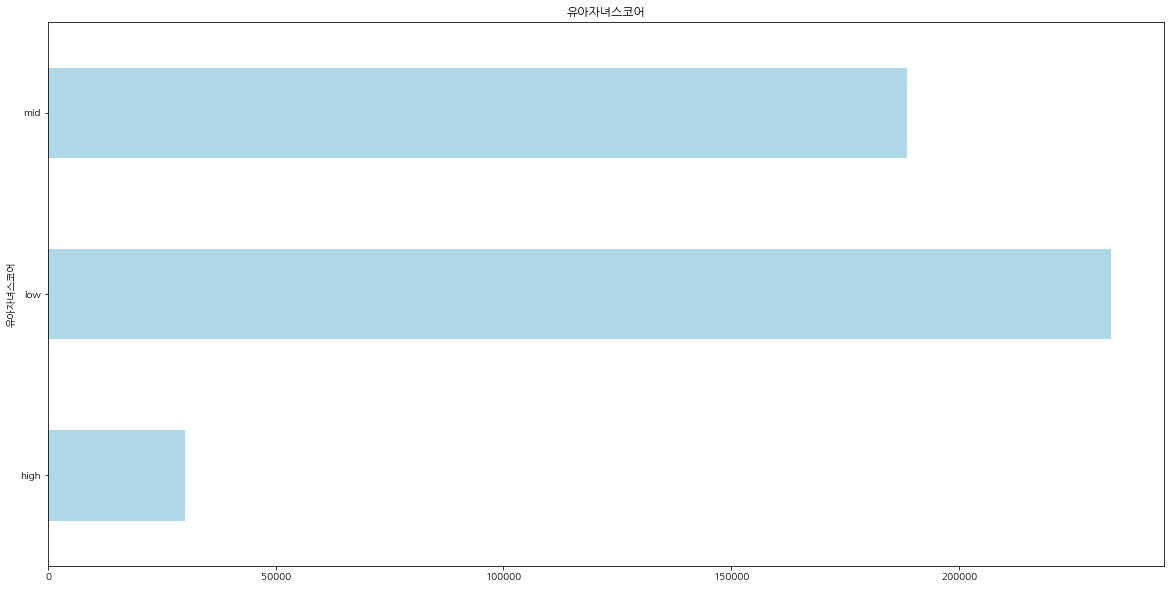

In [194]:
baby= data.groupby("유아자녀스코어").count()['Category']

baby.plot(kind='barh', stacked=True,  color='lightblue', title="유아자녀스코어")

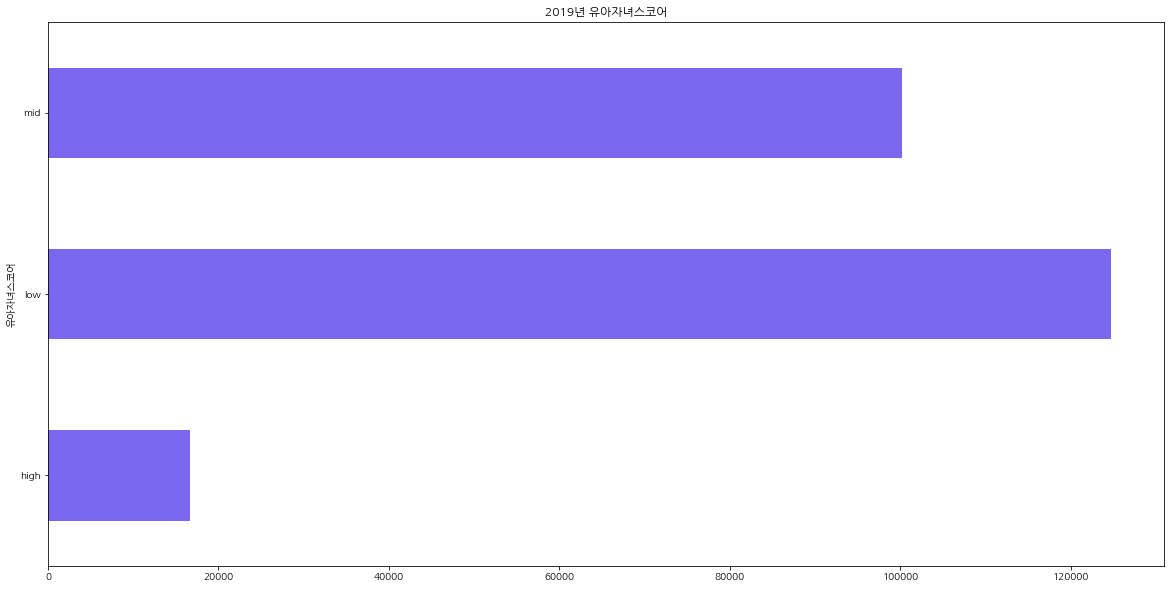

In [195]:
baby_2019= data_2019.groupby("유아자녀스코어").count()['Category']

baby_2019.plot(kind='barh', stacked=True,  color='mediumslateblue', title="2019년 유아자녀스코어")

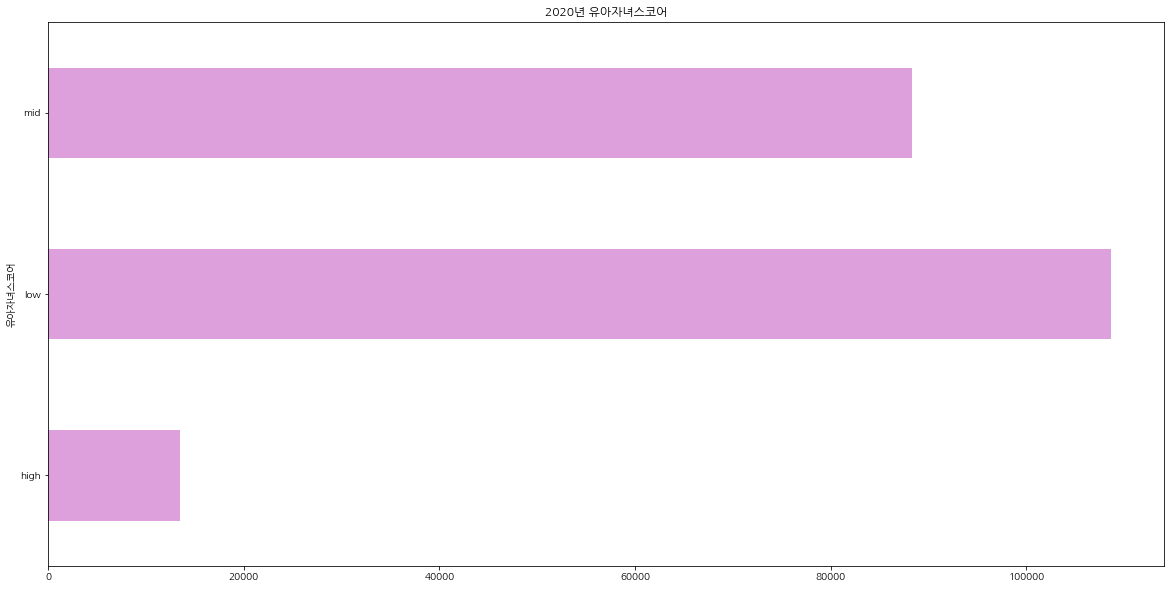

In [196]:
baby_2020= data_2020.groupby("유아자녀스코어").count()['Category']

baby_2020.plot(kind='barh', stacked=True, color='plum', title="2020년 유아자녀스코어")

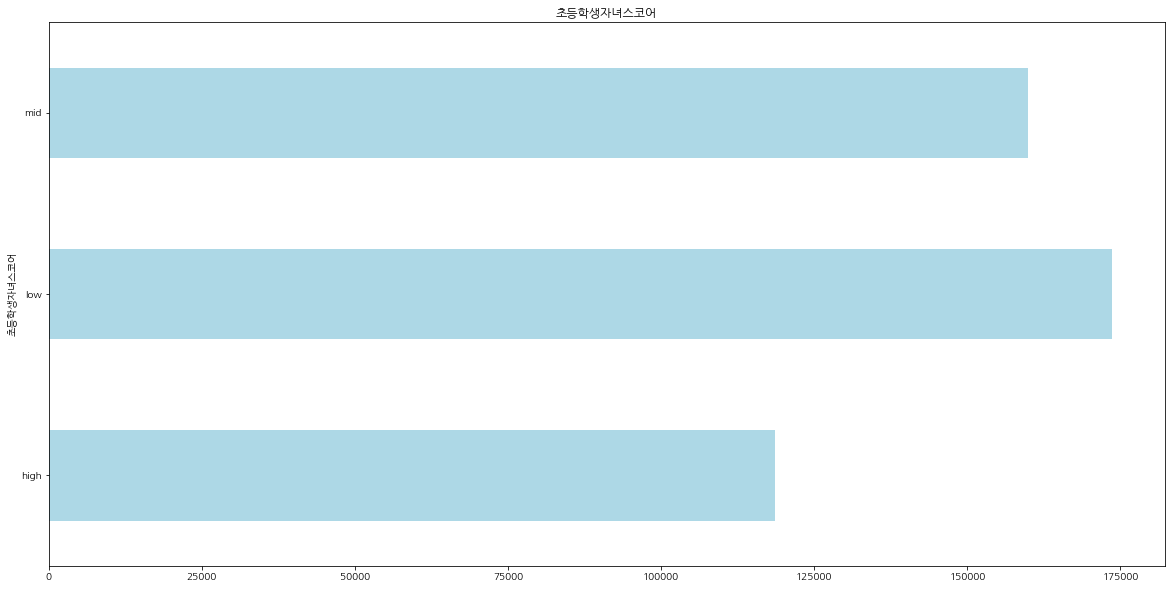

In [197]:
ele_crd= data.groupby("초등학생자녀스코어").count()['Category']

ele_crd.plot(kind='barh', stacked=True,  color='lightblue', title="초등학생자녀스코어")

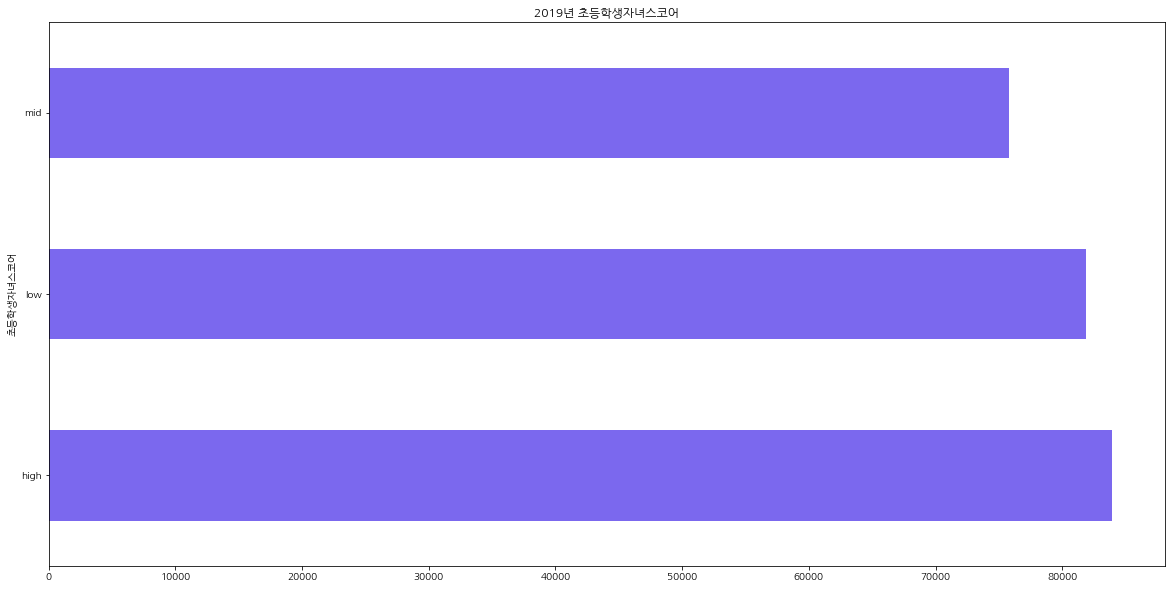

In [198]:
ele_crd_2019= data_2019.groupby("초등학생자녀스코어").count()['Category']

ele_crd_2019.plot(kind='barh', stacked=True,  color='mediumslateblue', title="2019년 초등학생자녀스코어")

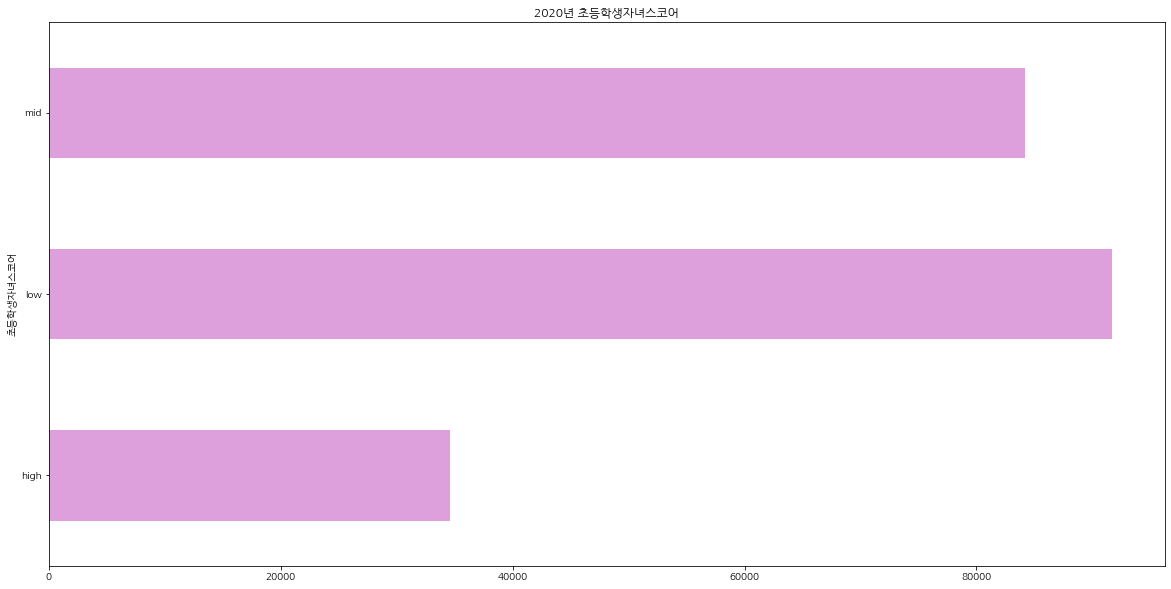

In [199]:
ele_crd_2020= data_2020.groupby("초등학생자녀스코어").count()['Category']

ele_crd_2020.plot(kind='barh', stacked=True,  color='plum', title="2020년 초등학생자녀스코어")

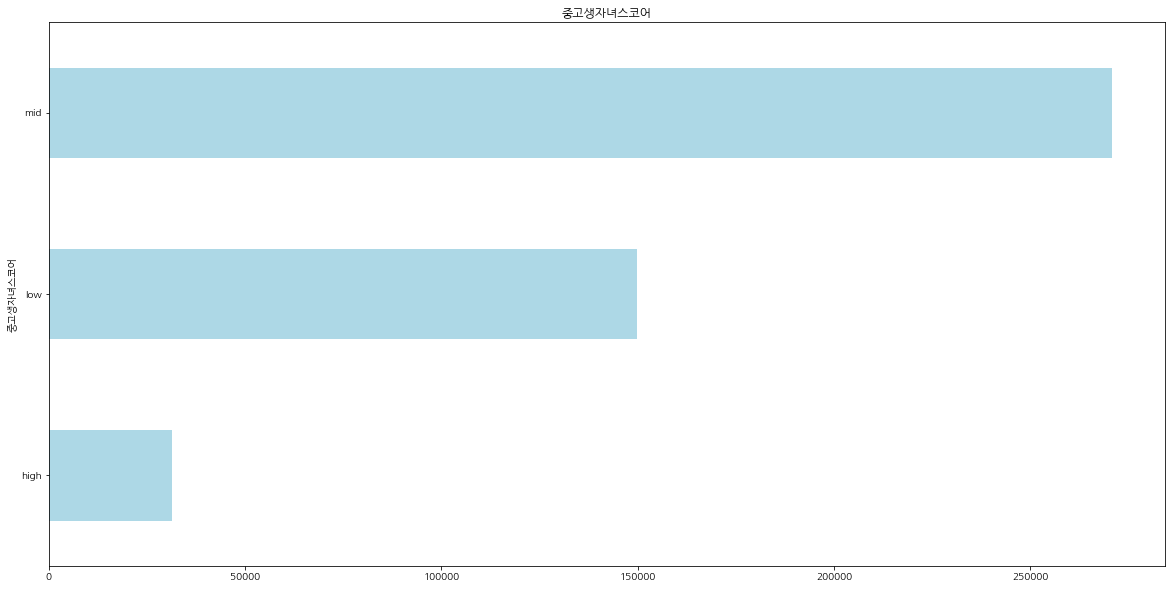

In [200]:
mid_crd= data.groupby("중고생자녀스코어").count()['Category']

mid_crd.plot(kind='barh', stacked=True,  color='lightblue', title="중고생자녀스코어")

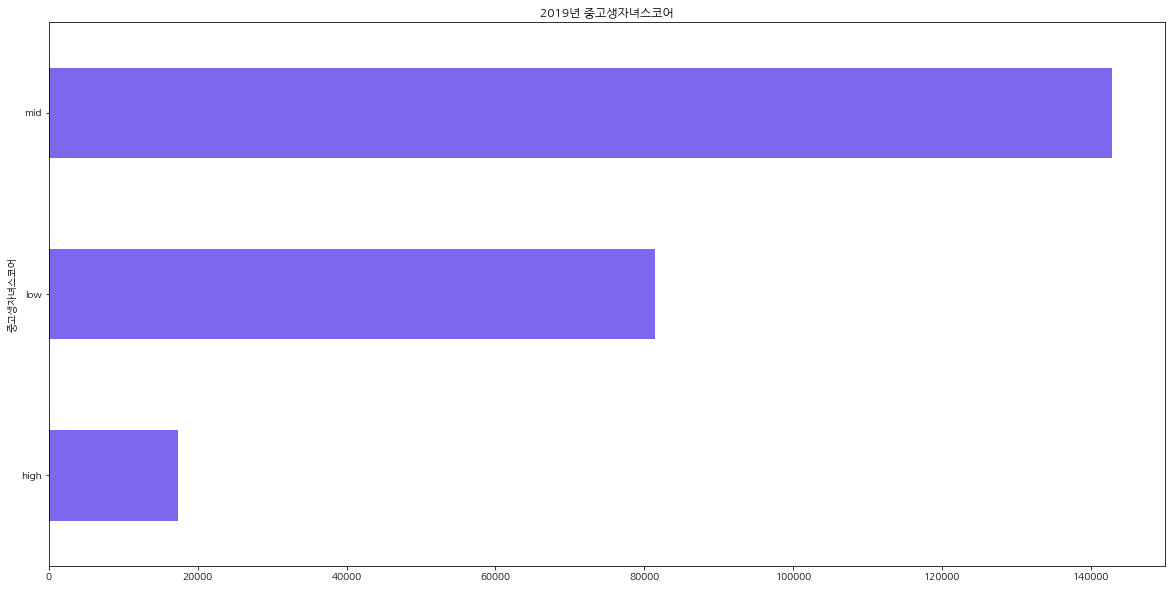

In [201]:
mid_crd_2019= data_2019.groupby("중고생자녀스코어").count()['Category']

mid_crd_2019.plot(kind='barh', stacked=True,  color='mediumslateblue', title="2019년 중고생자녀스코어")

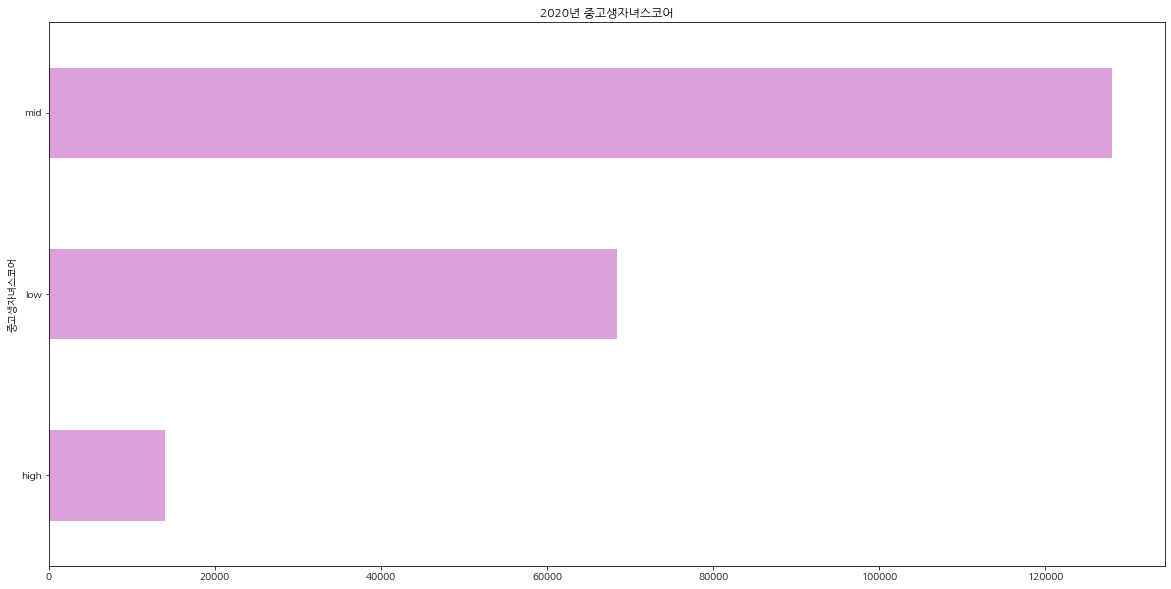

In [202]:
mid_crd_2020= data_2020.groupby("중고생자녀스코어").count()['Category']

mid_crd_2020.plot(kind='barh', stacked=True, color='plum', title="2020년 중고생자녀스코어")

### 연령 예측하기

In [204]:
data.columns

Index(['YM', 'Category', '성별구분', '연령대', '기혼스코어', '유아자녀스코어', '초등학생자녀스코어',
       '중고생자녀스코어', '대학생자녀스코어', '전업주부스코어'],
      dtype='object')

In [214]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 452038 entries, 0 to 452037
Data columns (total 10 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   YM         452038 non-null  int64 
 1   Category   452038 non-null  object
 2   성별구분       452038 non-null  int64 
 3   연령대        452038 non-null  object
 4   기혼스코어      452038 non-null  object
 5   유아자녀스코어    452038 non-null  object
 6   초등학생자녀스코어  452038 non-null  object
 7   중고생자녀스코어   452038 non-null  object
 8   대학생자녀스코어   452038 non-null  object
 9   전업주부스코어    452038 non-null  object
dtypes: int64(2), object(8)
memory usage: 34.5+ MB


In [218]:
for i in columns_to_change:
  data[i]=data[i].astype('int64')

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 452038 entries, 0 to 452037
Data columns (total 10 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   YM         452038 non-null  int64 
 1   Category   452038 non-null  object
 2   성별구분       452038 non-null  int64 
 3   연령대        452038 non-null  object
 4   기혼스코어      452038 non-null  int64 
 5   유아자녀스코어    452038 non-null  int64 
 6   초등학생자녀스코어  452038 non-null  int64 
 7   중고생자녀스코어   452038 non-null  int64 
 8   대학생자녀스코어   452038 non-null  int64 
 9   전업주부스코어    452038 non-null  int64 
dtypes: int64(8), object(2)
memory usage: 34.5+ MB


In [221]:
data['기혼대학생']=(data['기혼스코어']*data['대학생자녀스코어'])
data['기혼중고생']=(data['기혼스코어']*data['중고생자녀스코어'])
data['기혼초등생']=(data['기혼스코어']*data['초등학생자녀스코어'])
data['기혼유아']=(data['기혼스코어']*data['유아자녀스코어'])

In [222]:
data.head()

,YM,Category,성별구분,연령대,기혼스코어,유아자녀스코어,초등학생자녀스코어,중고생자녀스코어,대학생자녀스코어,전업주부스코어,기혼대학생,기혼중고생,기혼초등생,기혼유아
0,202005,할인점,0,F,3,1,3,2,1,1,3,6,9,3
1,202005,취미,0,B,3,1,2,2,1,1,3,6,6,3
2,202005,오픈마켓/소셜,1,D,2,2,2,2,1,2,2,4,4,4
3,202005,뷰티,0,D,2,2,2,2,1,1,2,4,4,4
4,202005,오픈마켓/소셜,0,G,3,1,2,2,2,1,6,6,6,3


In [227]:
data.groupby('연령대')['기혼대학생'].value_counts()

연령대  기혼대학생
A    3        56970
     6        14658
     9           12
B    3        19906
     6        14389
     9          730
C    2        46063
     3         9859
     1          348
D    2        39297
     3        36875
E    1        30234
     2        22008
     3         2332
F    6        34932
     3        34415
     9          804
G    6        31275
     3        17612
     9         2208
H    3        32826
     6         4256
     9           29
Name: 기혼대학생, dtype: int64

In [228]:
data.groupby('기혼대학생')['연령대'].value_counts()

기혼대학생  연령대
1      E      30234
       C        348
2      C      46063
       D      39297
       E      22008
3      A      56970
       D      36875
       F      34415
       H      32826
       B      19906
       G      17612
       C       9859
       E       2332
6      F      34932
       G      31275
       A      14658
       B      14389
       H       4256
9      G       2208
       F        804
       B        730
       H         29
       A         12
Name: 연령대, dtype: int64

- 대학생 자녀를 둔 기혼자 중 높은 점수를 보여주는 그룹은 순서대로 G, F, B 이다

In [229]:
data.groupby('기혼중고생')['연령대'].value_counts()

기혼중고생  연령대
1      E      30234
       C        348
2      C      46063
       E      22008
       D        111
3      H      37111
       C       9859
       E       2332
       B       1184
       G        277
       F        226
       A        163
       D          6
4      D      38814
6      A      58294
       F      56923
       G      48735
       D      34562
       B      33758
9      A      13183
       F      13002
       D       2679
       G       2083
       B         83
Name: 연령대, dtype: int64

- 중고생 자녀를 둔 기혼자 중 높은 점수를 보여주는 그룹은 순서대로 A,F,D 이다

In [230]:
data.groupby('기혼초등생')['연령대'].value_counts()

기혼초등생  연령대
1      E      30234
       C         39
2      E      22008
       D       9399
       C       4461
3      H      37111
       A      29189
       D      16502
       F      14745
       G       3211
       B       2359
       E       2332
       C       2283
4      C      24818
       D      20120
6      F      36720
       G      25763
       A      24616
       C      21842
       D      20269
       B      12353
9      G      22121
       B      20313
       F      18686
       A      17835
       D       9882
       C       2827
Name: 연령대, dtype: int64

초등학생 자녀를 둔 기혼자 중 높은 점수를 보여주는 그룹은 순서대로 G, B, F 이다

In [231]:
data.groupby('기혼유아')['연령대'].value_counts()

기혼유아  연령대
1     E      17239
      C         74
2     E      14990
      C       1384
      D       1161
3     F      63371
      G      51095
      H      37111
      B      35025
      A      24402
      E        585
      D        160
4     C      37437
      D      34163
      E      17936
6     A      44689
      D      31299
      C      13050
      F       6771
      E       3483
9     D       9389
      C       4325
      A       2549
      E        341
      F          9
Name: 연령대, dtype: int64

In [234]:
data.groupby('기혼스코어')['연령대'].value_counts()

기혼스코어  연령대
1      E      30234
       C        348
2      C      46063
       D      39297
       E      22008
3      A      71640
       F      70151
       G      51095
       H      37111
       D      36875
       B      35025
       C       9859
       E       2332
Name: 연령대, dtype: int64

- 위 자료를 토대로 임의 배정 했습니다.
  + 20-24 : E
  + 25-29 : C
  + 30-34 : D
  + 35-39 : B
  + 40-44 : A
  + 45-49 : F
  + 50-54 : G
  + 55-59 : H

In [244]:
Ages={"A":"40-44","B":"35-39","C":"25-29","D":"30-44","E":"20-24","F":"45-49","G":"50-54","H":"55-59"}
data['Age']=data['연령대'].map(Ages)

- 모자이크 플롯

In [247]:
import numpy as np
import pandas as pd

from statsmodels.graphics.mosaicplot import mosaic

import matplotlib.pyplot as plt
import seaborn as sns



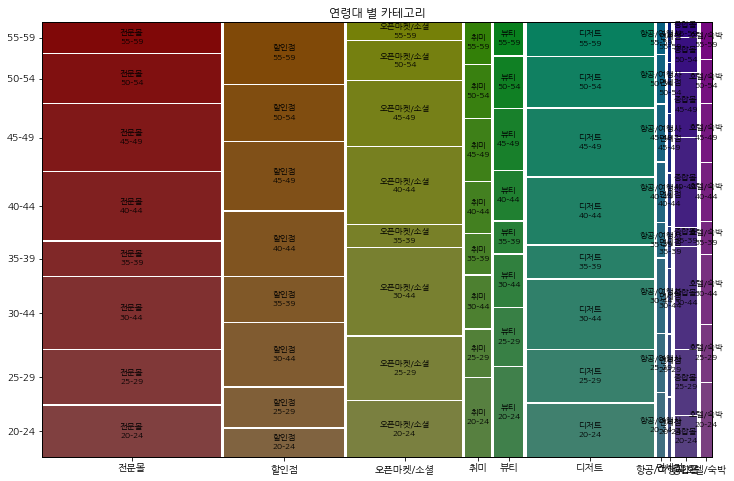

In [248]:
mosaic(data.sort_values('Age'), ['Category', 'Age'], 
      title='연령대 별 카테고리')
plt.show()

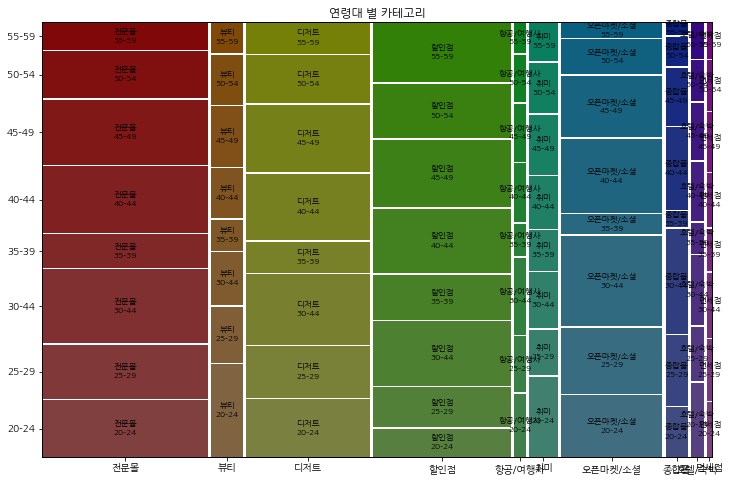

In [256]:
mosaic(data_2019.sort_values('Age'), ['Category', 'Age'], 
      title='연령대 별 카테고리')
plt.show()

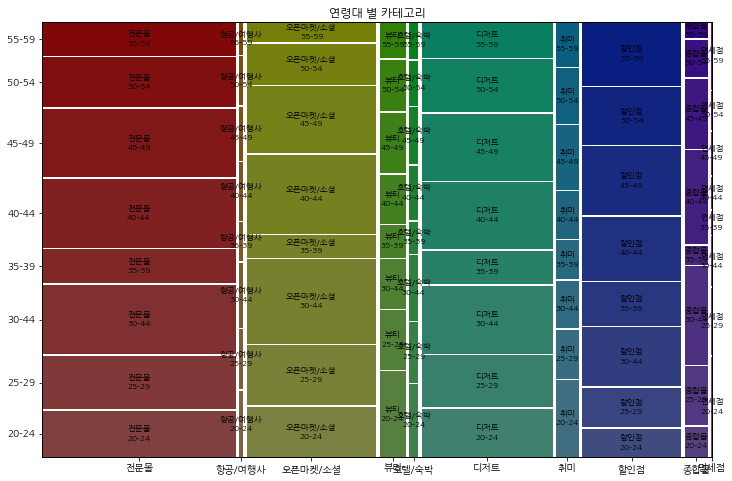

In [257]:
mosaic(data_2020.sort_values('Age'), ['Category', 'Age'], 
      title='연령대 별 카테고리')
plt.show()

- 20대 소비 패턴

In [288]:
data['YM']=data['YM'].astype('str')
data['Y']=data['YM'].str.extract('(\d{4})')
data.head()

,YM,Category,성별구분,연령대,기혼스코어,유아자녀스코어,초등학생자녀스코어,중고생자녀스코어,대학생자녀스코어,전업주부스코어,기혼대학생,기혼중고생,기혼초등생,기혼유아,Age,Y
0,202005,할인점,0,F,3,1,3,2,1,1,3,6,9,3,45-49,2020
1,202005,취미,0,B,3,1,2,2,1,1,3,6,6,3,35-39,2020
2,202005,오픈마켓/소셜,1,D,2,2,2,2,1,2,2,4,4,4,30-44,2020
3,202005,뷰티,0,D,2,2,2,2,1,1,2,4,4,4,30-44,2020
4,202005,오픈마켓/소셜,0,G,3,1,2,2,2,1,6,6,6,3,50-54,2020


In [291]:
twenties = data[(data['연령대']=="E")|(data['연령대']=="C")]

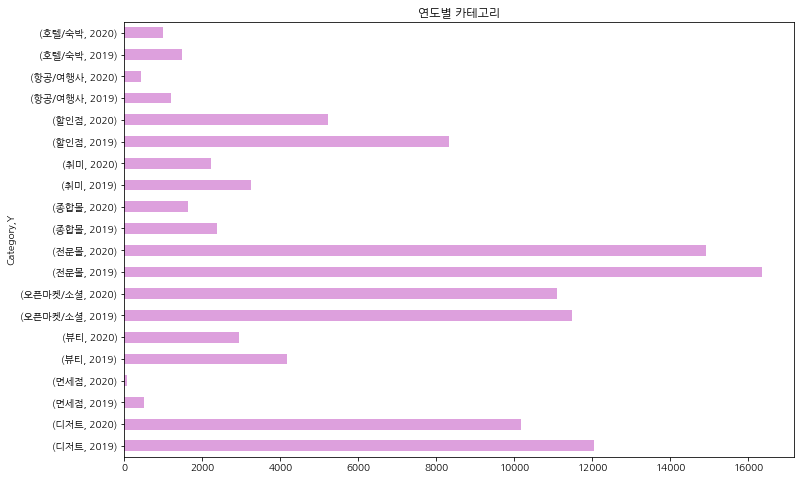

In [292]:
Y_twenties=twenties.groupby("Category")['Y'].value_counts()
Y_twenties.plot(kind='barh', stacked=True, color='plum', title="연도별 카테고리")

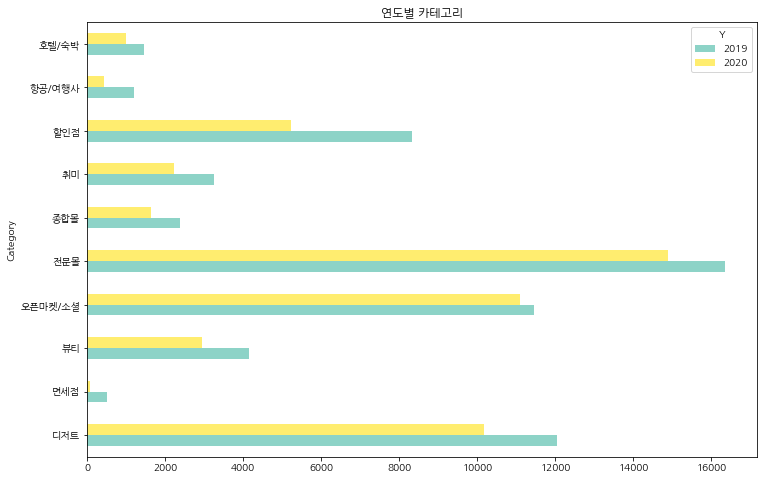

In [305]:
Y_twenties=twenties.groupby(['Category','Y'])['연령대'].count().unstack('Y')
Y_twenties.plot(kind='barh', stacked=False, colormap='Set3', title="연도별 카테고리")